In [1]:
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors, Draw


========== radius = 2 ==========

可視化するビット ID: [170, 294, 389]


[15:17:08] DEPRECATION WARNING: please use MorganGenerator


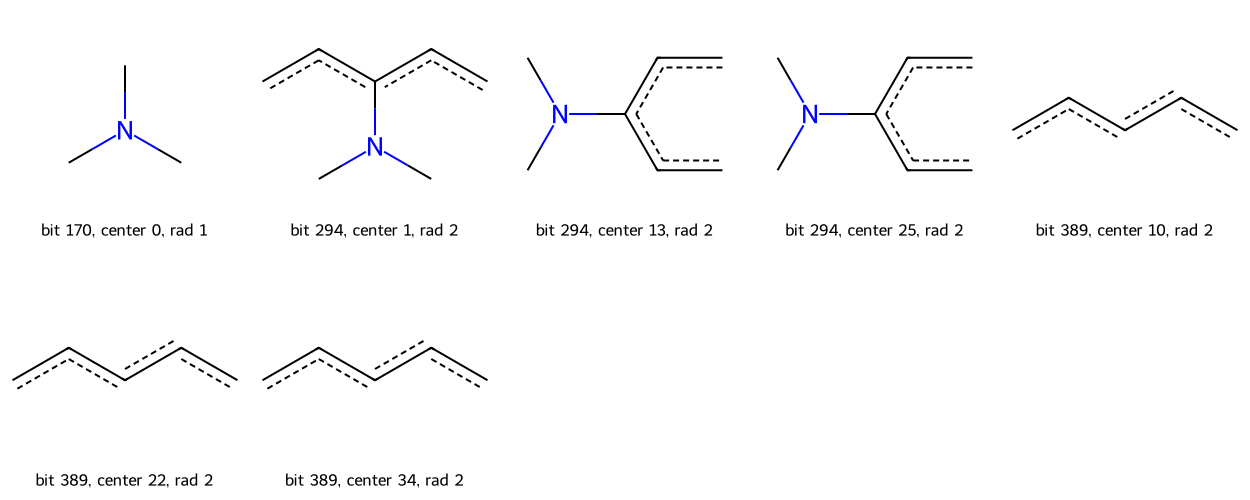


========== radius = 3 ==========

可視化するビット ID: [170, 294, 389]


[15:17:08] DEPRECATION WARNING: please use MorganGenerator


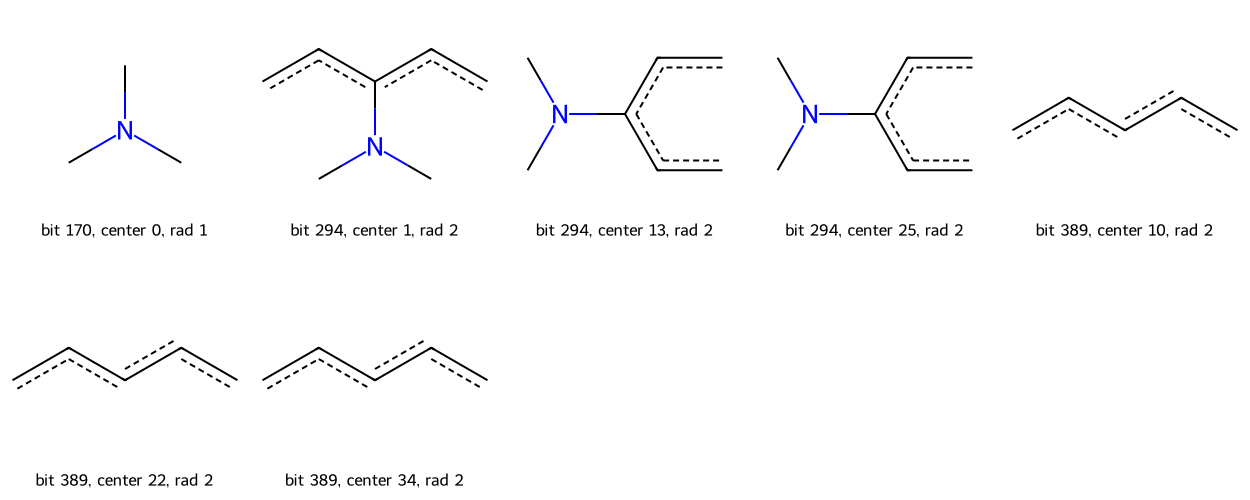


========== radius = 4 ==========

可視化するビット ID: [170, 294, 389]


[15:17:08] DEPRECATION WARNING: please use MorganGenerator


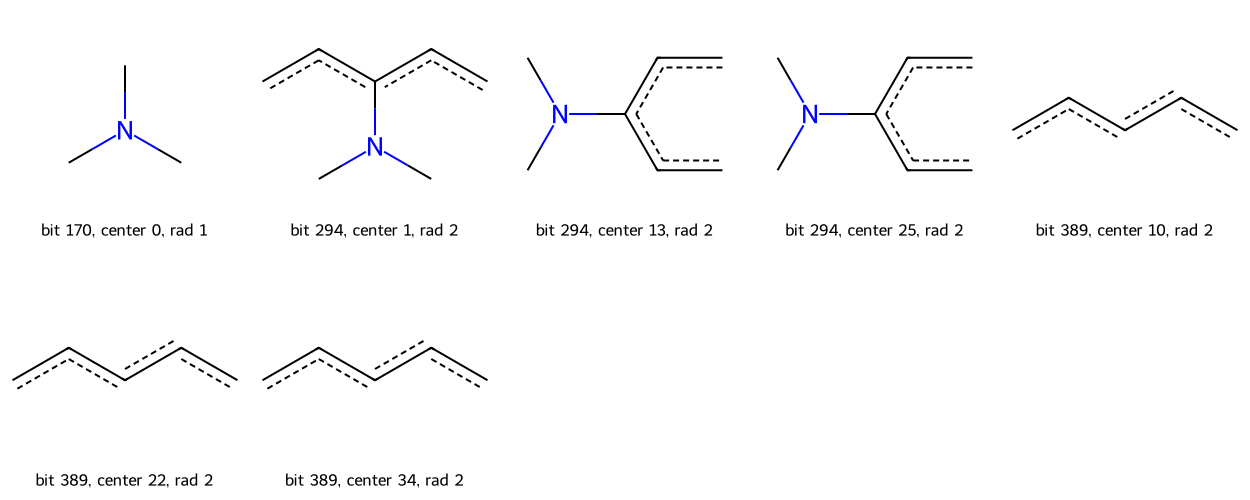

In [4]:


# ---- 入力 SMILES ----
smiles = "N(C1=CC=C(C=C1)C2=CC=CC=C2)(C3=CC=C(C=C3)C4=CC=CC=C4)C5=CC=C(C=C5)C6=CC=CC=C6"
mol = Chem.MolFromSmiles(smiles)

# ---- Morgan Fingerprint の半径 ----
radii = [2, 3, 4]

# ---- 各 r で部分構造を 5 個可視化 ----
for r in radii:
    print(f"\n========== radius = {r} ==========\n")

    # Morgan Fingerprint を計算 (bitInfo を取得)
    bitInfo = {}
    fp = rdMolDescriptors.GetMorganFingerprintAsBitVect(
        mol, radius=r, nBits=2048, bitInfo=bitInfo
    )

    # 登録されたビット（部分構造候補）
    bits = list(bitInfo.keys())

    # 可視化するビットを 5 個選択（ビット数が少ない場合はその数だけ）
    selected_bits = bits[:3]

    print(f"可視化するビット ID: {selected_bits}")

    submols = []
    legends = []

    for bit in selected_bits:
        # bitInfo[bit] に (center_atom_idx, radius) のタプルが入っている
        for atom_idx, rad in bitInfo[bit]:
            # 部分構造の atom indices を取得
            env = Chem.FindAtomEnvironmentOfRadiusN(mol, rad, atom_idx)
            atoms = set()
            for bidx in env:
                bond = mol.GetBondWithIdx(bidx)
                atoms.add(bond.GetBeginAtomIdx())
                atoms.add(bond.GetEndAtomIdx())

            # 部分構造を Mol として抽出
            submol = Chem.PathToSubmol(mol, env)
            submols.append(submol)
            legends.append(f"bit {bit}, center {atom_idx}, rad {rad}")

    # 画像としてまとめて可視化
    img = Draw.MolsToGridImage(
        submols,
        molsPerRow=5,
        subImgSize=(250, 250),
        legends=legends
    )

    display(img)


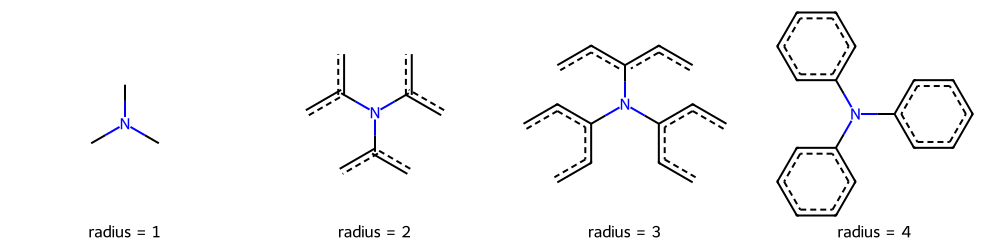

In [5]:
# ---- 入力 SMILES ----
smiles = "N(C1=CC=C(C=C1)C2=CC=CC=C2)(C3=CC=C(C=C3)C4=CC=CC=C4)C5=CC=C(C=C5)C6=CC=CC=C6"
mol = Chem.MolFromSmiles(smiles)

# ---- 中心にする原子インデックス（今回は 0 に固定） ----
center_atom = 0

# ---- 比較する半径 ----
radii = [1, 2, 3, 4]

submols = []
legends = []

for r in radii:
    # 部分構造の bond index リスト
    env = Chem.FindAtomEnvironmentOfRadiusN(mol, r, center_atom)

    # bond → atom に変換（submol抽出に必要）
    submol = Chem.PathToSubmol(mol, env)

    submols.append(submol)
    legends.append(f"radius = {r}")

# ---- 画像としてまとめて可視化 ----
img = Draw.MolsToGridImage(
    submols,
    molsPerRow=4,
    subImgSize=(250, 250),
    legends=legends
)

img

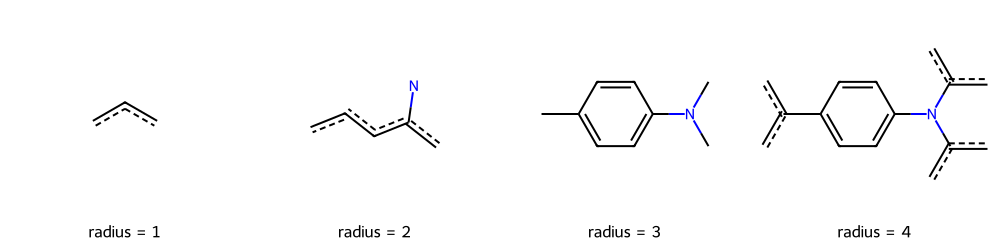

In [7]:
# ---- 入力 SMILES ----
smiles = "N(C1=CC=C(C=C1)C2=CC=CC=C2)(C3=CC=C(C=C3)C4=CC=CC=C4)C5=CC=C(C=C5)C6=CC=CC=C6"
mol = Chem.MolFromSmiles(smiles)

# ---- 中心にする原子インデックス（今回は 0 に固定） ----
center_atom = 2

# ---- 比較する半径 ----
radii = [1, 2, 3, 4]

submols = []
legends = []

for r in radii:
    # 部分構造の bond index リスト
    env = Chem.FindAtomEnvironmentOfRadiusN(mol, r, center_atom)

    # bond → atom に変換（submol抽出に必要）
    submol = Chem.PathToSubmol(mol, env)

    submols.append(submol)
    legends.append(f"radius = {r}")

# ---- 画像としてまとめて可視化 ----
img = Draw.MolsToGridImage(
    submols,
    molsPerRow=4,
    subImgSize=(250, 250),
    legends=legends
)

img